In [1]:
pip uninstall -y shap && pip install -U shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/89/fa/7c84d9f45d8407d8f32ba01a0c5ea5c1a9307430cde0c0281af2361b5af6/shap-0.47.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached shap-0.47.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (24 kB)
Using cached shap-0.47.0-cp311-cp311-macosx_10_9_x86_64.whl (539 kB)

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importing Necessary Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display

df_loan_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv.xls')
df_loan_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv.xls')

df_loan_train.shape, df_loan_test.shape

((614, 13), (367, 12))

In [5]:
df_loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Model's accuracy should be greater than Baseline

In [7]:
display(df_loan_train['Loan_Status'].value_counts())

display(df_loan_train['Loan_Status'].value_counts()/df_loan_train.shape[0])

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Loan_Status
Y    0.687296
N    0.312704
Name: count, dtype: float64

EDA-Exploratory Data Analysis

In [8]:
df_loan_train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [9]:
df_loan_train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [10]:
null_counts = df_loan_train.isnull().sum()

display(null_counts)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for column in categorical_columns:
    df_loan_train[column] = df_loan_train[column].fillna('Unknown')

numerical_columns = ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

for column in numerical_columns:
    df_loan_train[column] = df_loan_train[column].fillna(0)


display(df_loan_train.head())

null_counts = df_loan_train.isnull().sum()

display(null_counts)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = df_loan_train.copy()

categorical_columns = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'
]
numerical_columns = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
]

features = numerical_columns + categorical_columns
target = 'Loan_Status'

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check the DataFrame structure to ensure dtype conversion
print(df.dtypes)

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status            object
dtype: object


In [13]:
# Encode the target variable  
df[target] = df[target].map({'Y' :1 , 'N' :0})
df[target]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [14]:
# Split the data into training and validation sets
X = df[features]
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.15, random_state=42)

# Resetting the index
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [15]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((521, 11), (521,), (93, 11), (93,))

In [16]:
# Create and train the LightGBM model
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_columns)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model with early stopping
model = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_eval,
                  callbacks=[lgb.early_stopping(stopping_rounds=10)])

[LightGBM] [Info] Number of positive: 367, number of negative: 154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 521, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.704415 -> initscore=0.868409
[LightGBM] [Info] Start training from score 0.868409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [17]:
# Predict on the test set
y_pred = model.predict(X_val, num_iteration=model.best_iteration)
prediction = y_pred
y_pred = (y_pred > 0.5).astype(int)

# Get the best iteration
best_iteration = model.best_iteration
print(f"The model trained for {best_iteration} rounds.")

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the model (optional)
model.save_model('lightgbm_model.txt')

The model trained for 35 rounds.
Accuracy: 74.19%


Global Importance of Features

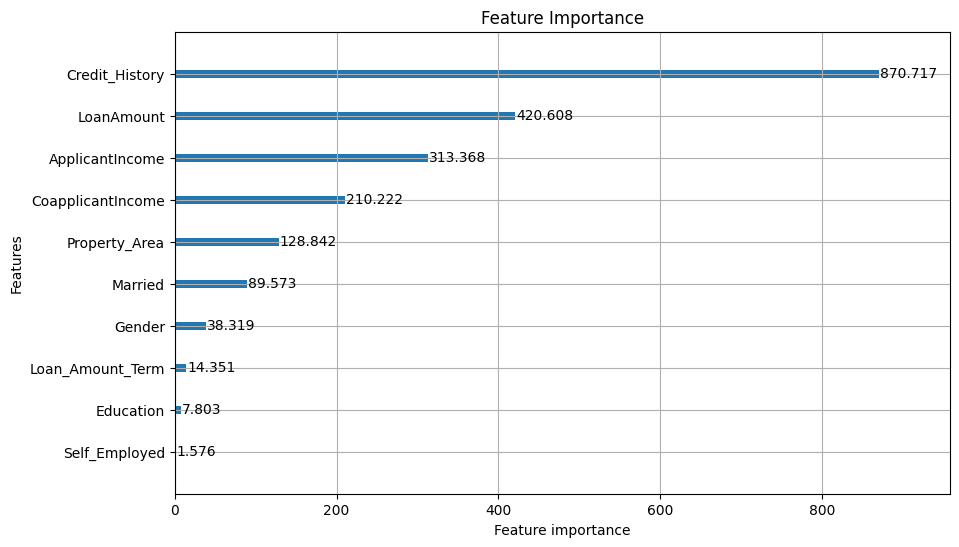

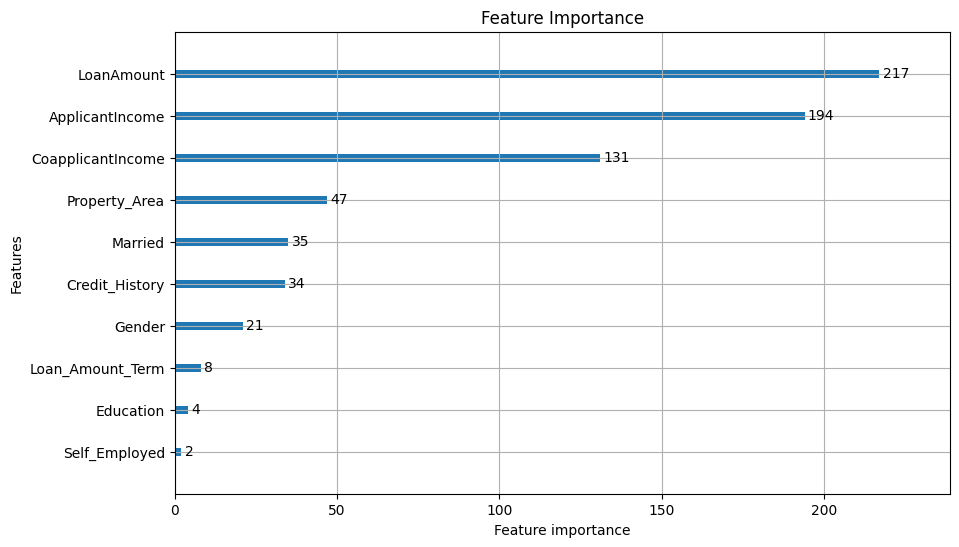

In [18]:
import matplotlib.pyplot as plt

# Plot feature importance
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


# Plot feature importance
lgb.plot_importance(model, max_num_features=20, importance_type='split', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

Getting Predictions for Test Set

In [19]:
null_counts = df_loan_test.isnull().sum()

display(null_counts)

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for column in categorical_columns:
    df_loan_test[column] = df_loan_train[column].fillna('Unknown')

numerical_columns = ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

for column in numerical_columns:
    df_loan_test[column] = df_loan_train[column].fillna(0)


display(df_loan_test.head())

# Get the number of null values in each column
null_counts = df_loan_test.isnull().sum()

display(null_counts)

# Convert categorical columns to 'category' dtype
for col in categorical_columns:
    df_loan_test[col] = df_loan_test[col].astype('category')

X_test = df_loan_test[features]

# Predict on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

df_loan_test['prediction'] = y_pred

df_loan_test.head()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001031,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001035,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction
0,LP001015,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,0.745423
1,LP001022,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.511991
2,LP001031,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0.578365
3,LP001035,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0.912665
4,LP001051,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0.818647


Analysing some high risk and low risk cases

In [20]:
df_test_low_loan_prob = X_test[df_loan_test['prediction'] < 0.4].sample(n = 5, random_state=42).reset_index(drop=True)

df_test_high_loan_prob = X_test[df_loan_test['prediction'] > 0.8].sample(n = 5, random_state=42).reset_index(drop=True)

df_test_low_loan_prob.shape, df_test_high_loan_prob.shape

((5, 11), (5, 11))

Instance level explaination with SHAP

Probability: 0.38327750055995946, Log of Odds : -0.47565989357035215


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,2400,1863.0,104.0,360.0,0.0,Female,No,0,Graduate,No,Urban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,0.033781,2400,1.04707
1,CoapplicantIncome,-0.102413,1863.0,1.04707
2,LoanAmount,-0.024977,104.0,1.04707
3,Loan_Amount_Term,0.005022,360.0,1.04707
4,Credit_History,-1.278582,0.0,1.04707
5,Gender,0.014260,Female,1.04707
6,Married,-0.132506,No,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.009657,Graduate,1.04707
9,Self_Employed,-0.001088,No,1.04707


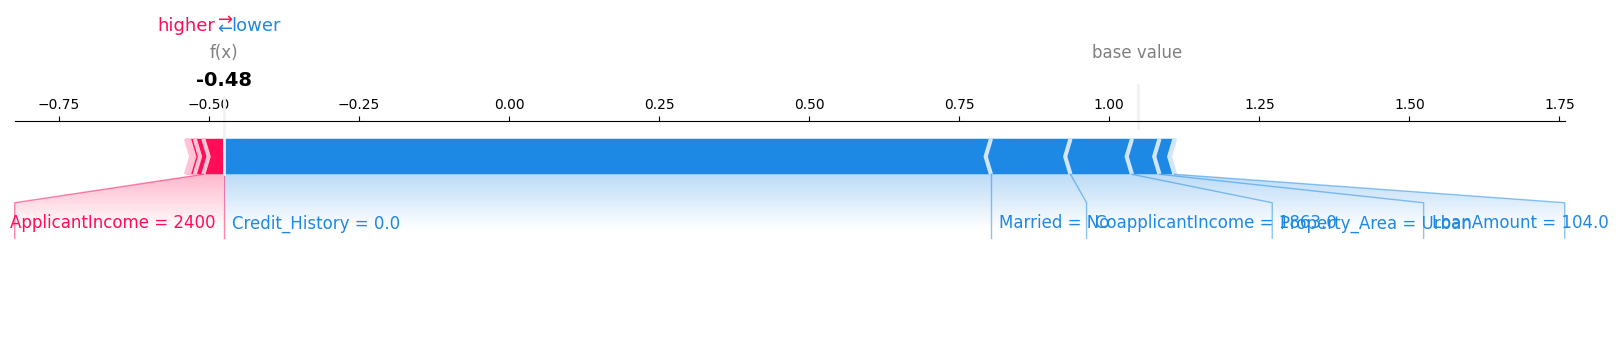

Probability: 0.38218953357973184, Log of Odds : -0.4802650750159783


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,6333,4583.0,259.0,360.0,0.0,Male,Yes,0,Graduate,No,Semiurban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.035090,6333,1.04707
1,CoapplicantIncome,-0.074361,4583.0,1.04707
2,LoanAmount,-0.217772,259.0,1.04707
3,Loan_Amount_Term,0.009174,360.0,1.04707
4,Credit_History,-1.405353,0.0,1.04707
5,Gender,-0.007221,Male,1.04707
6,Married,0.085096,Yes,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.002692,Graduate,1.04707
9,Self_Employed,-0.001102,No,1.04707


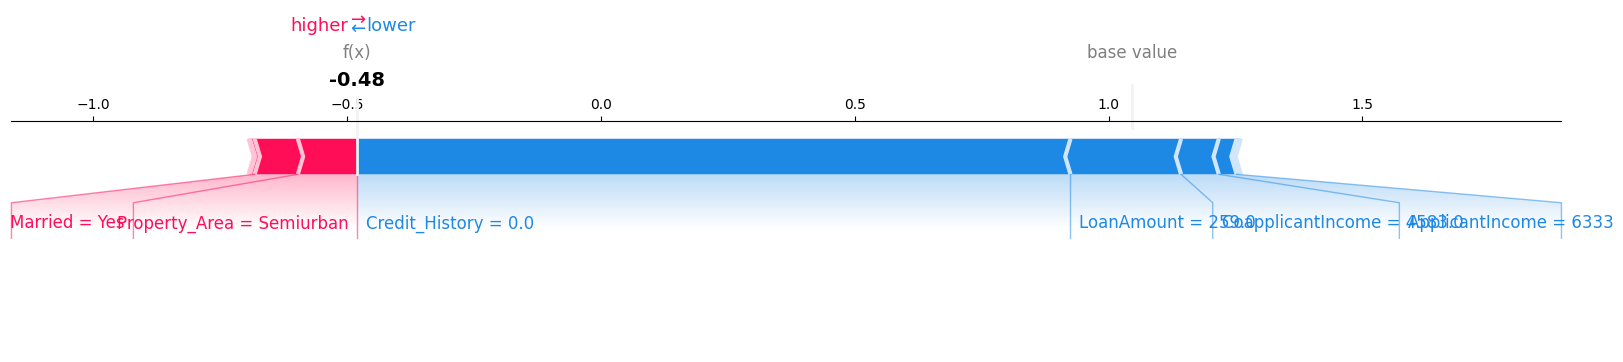

Probability: 0.2733516249893445, Log of Odds : -0.9776837247506964


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
2,3365,1917.0,112.0,360.0,0.0,Unknown,Yes,2,Not Graduate,No,Rural


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.115980,3365,1.04707
1,CoapplicantIncome,-0.155865,1917.0,1.04707
2,LoanAmount,0.063130,112.0,1.04707
3,Loan_Amount_Term,0.005320,360.0,1.04707
4,Credit_History,-1.585729,0.0,1.04707
5,Gender,-0.116288,Unknown,1.04707
6,Married,0.059512,Yes,1.04707
7,Dependents,0.000000,2,1.04707
8,Education,-0.001940,Not Graduate,1.04707
9,Self_Employed,-0.000571,No,1.04707


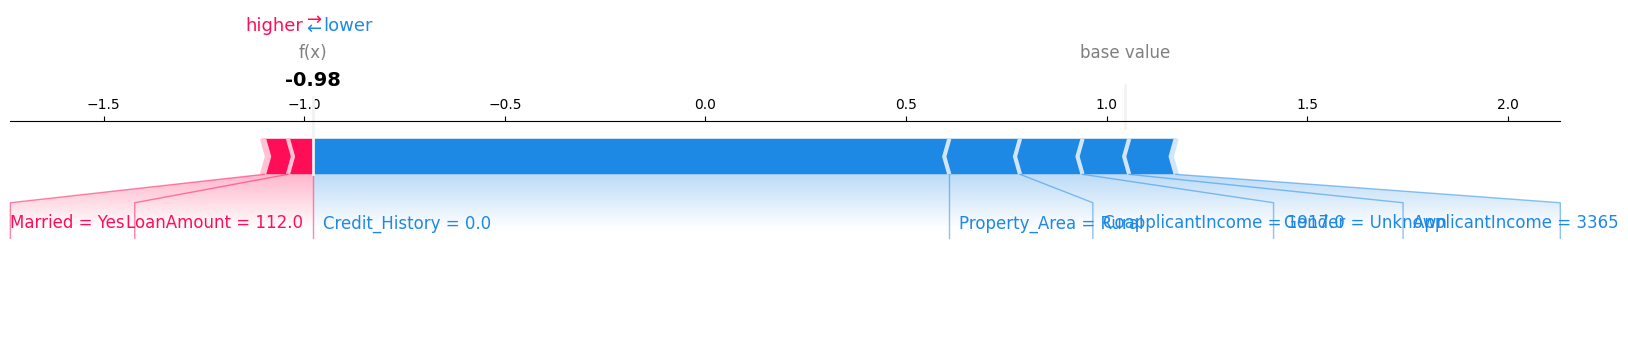

Probability: 0.31494519481096894, Log of Odds : -0.7771002036755659


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
3,6782,0.0,0.0,360.0,0.0,Male,No,0,Graduate,Unknown,Urban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.059588,6782,1.04707
1,CoapplicantIncome,-0.125754,0.0,1.04707
2,LoanAmount,-0.092305,0.0,1.04707
3,Loan_Amount_Term,0.004563,360.0,1.04707
4,Credit_History,-1.361022,0.0,1.04707
5,Gender,-0.016085,Male,1.04707
6,Married,-0.168615,No,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.010783,Graduate,1.04707
9,Self_Employed,0.004671,Unknown,1.04707


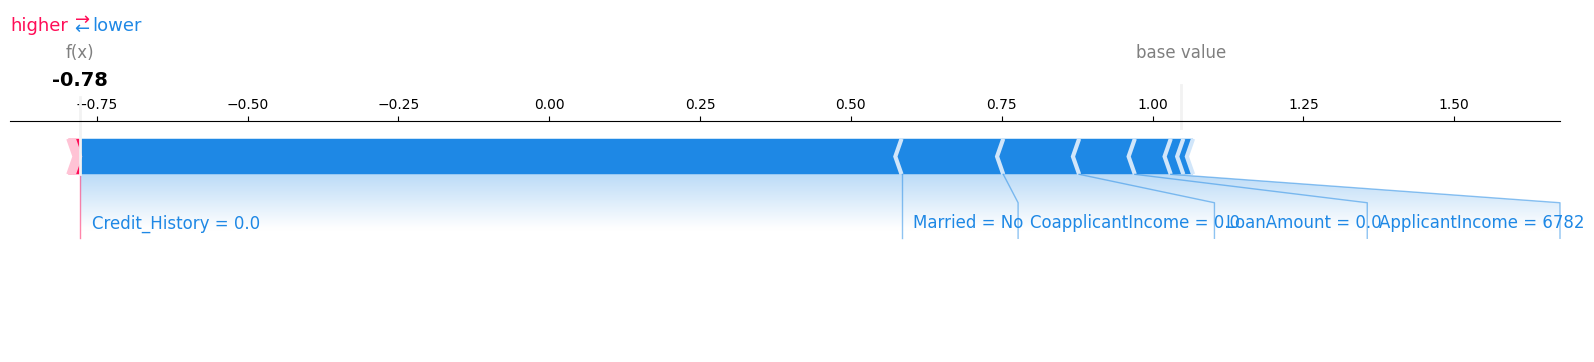

Probability: 0.3759431221840089, Log of Odds : -0.5068036534015224


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
4,6083,4250.0,330.0,360.0,0.0,Male,Yes,1,Graduate,No,Urban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.023650,6083,1.04707
1,CoapplicantIncome,-0.029153,4250.0,1.04707
2,LoanAmount,-0.246450,330.0,1.04707
3,Loan_Amount_Term,0.004069,360.0,1.04707
4,Credit_History,-1.300221,0.0,1.04707
5,Gender,-0.006078,Male,1.04707
6,Married,0.091578,Yes,1.04707
7,Dependents,0.000000,1,1.04707
8,Education,0.004788,Graduate,1.04707
9,Self_Employed,-0.001102,No,1.04707


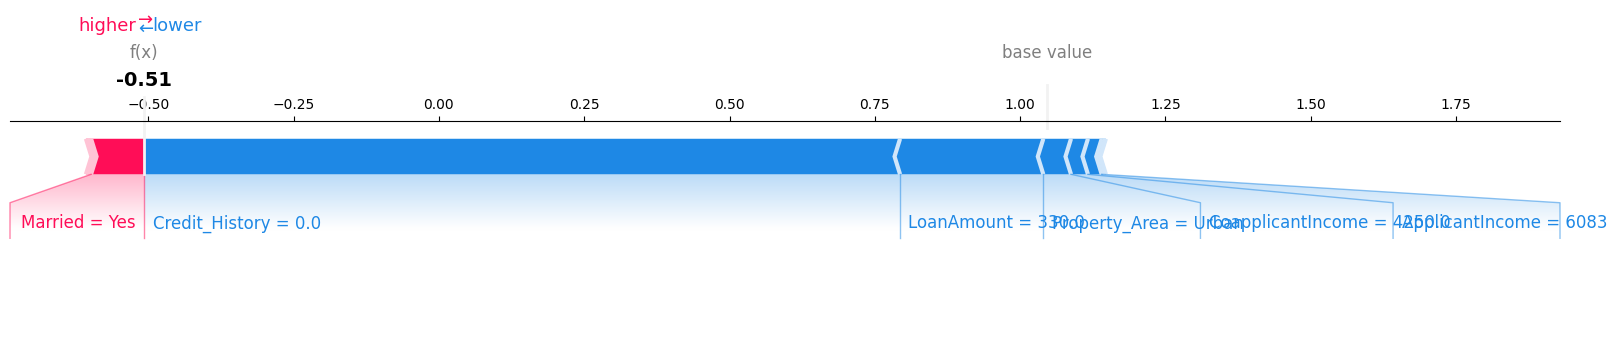

In [21]:
import shap
import matplotlib.pyplot as plt

# SHAP explanations
explainer = shap.TreeExplainer(model)


# Function to convert log-odds to probability
def probability_to_log_odds(prob):
    return np.log(prob/(1-prob))

X_tmp = df_test_low_loan_prob[features]
for i in range(X_tmp.shape[0]):  # Loop through all instances 
    # Select a specific instance to explain
    instance_idx = i  # Change this index to explain a different instance
    instance = X_tmp.iloc[instance_idx:instance_idx+1]

    probability = model.predict(instance, num_iteration=model.best_iteration)[0]

    print(f"Probability: {probability}, Log of Odds : {probability_to_log_odds(probability)}")


    # display(X_test.iloc[[instance_idx+1]])

    display(instance)

    # Calculate SHAP values for the specific instance
    instance_shap_values = explainer.shap_values(instance)

    # Create a dataframe with feature names, SHAP values, and expected value
    feature_names = instance.columns
    shap_values_instance = instance_shap_values[0]  # SHAP values for the positive class for the specific instance
    expected_value = explainer.expected_value  # Expected value for the positive class

    # Create a dataframe
    shap_df = pd.DataFrame({
        'Feature Name': feature_names,
        'SHAP Value': shap_values_instance,
        'Feature Value': instance.values[0],
        'Expected Value': [expected_value] * len(feature_names)
    })

    # Display the dataframe
    display(shap_df)
    shap.force_plot(explainer.expected_value, instance_shap_values[0], instance, matplotlib=True)
    plt.show()

Probability: 0.8094824786527274, Log of Odds : 1.4466509623161183


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,4600,0.0,73.0,180.0,1.0,Male,Yes,0,Graduate,No,Semiurban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.251387,4600,1.04707
1,CoapplicantIncome,-0.082256,0.0,1.04707
2,LoanAmount,-0.204213,73.0,1.04707
3,Loan_Amount_Term,-0.139682,180.0,1.04707
4,Credit_History,0.383495,1.0,1.04707
5,Gender,-0.009102,Male,1.04707
6,Married,0.188106,Yes,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.005169,Graduate,1.04707
9,Self_Employed,-0.002034,No,1.04707


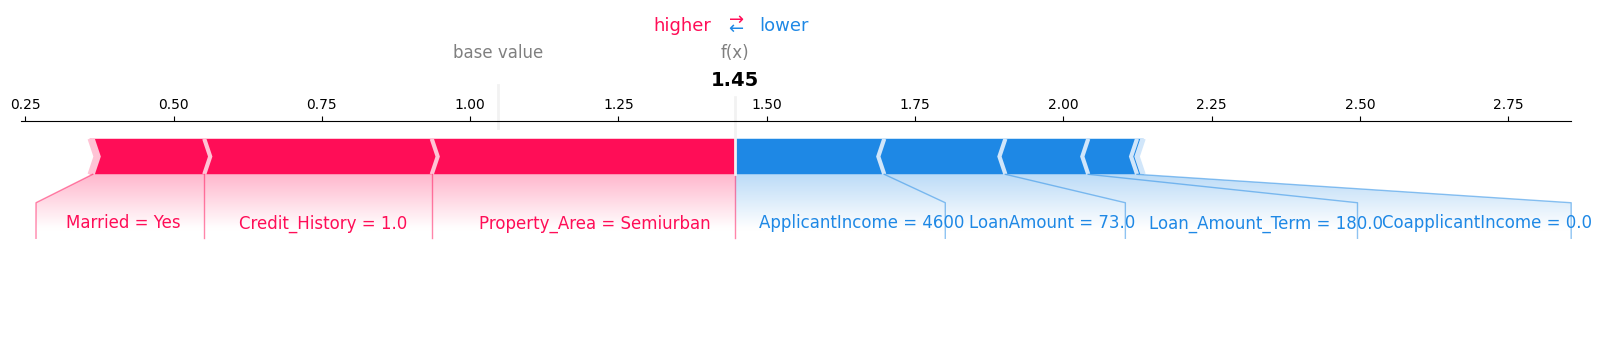

Probability: 0.9220360024463219, Log of Odds : 2.4703371206918447


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,1928,1644.0,100.0,360.0,1.0,Female,Yes,0,Not Graduate,No,Semiurban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,0.033956,1928,1.04707
1,CoapplicantIncome,-0.085777,1644.0,1.04707
2,LoanAmount,0.335599,100.0,1.04707
3,Loan_Amount_Term,0.033477,360.0,1.04707
4,Credit_History,0.502028,1.0,1.04707
5,Gender,-0.063355,Female,1.04707
6,Married,0.161520,Yes,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,-0.008269,Not Graduate,1.04707
9,Self_Employed,-0.000816,No,1.04707


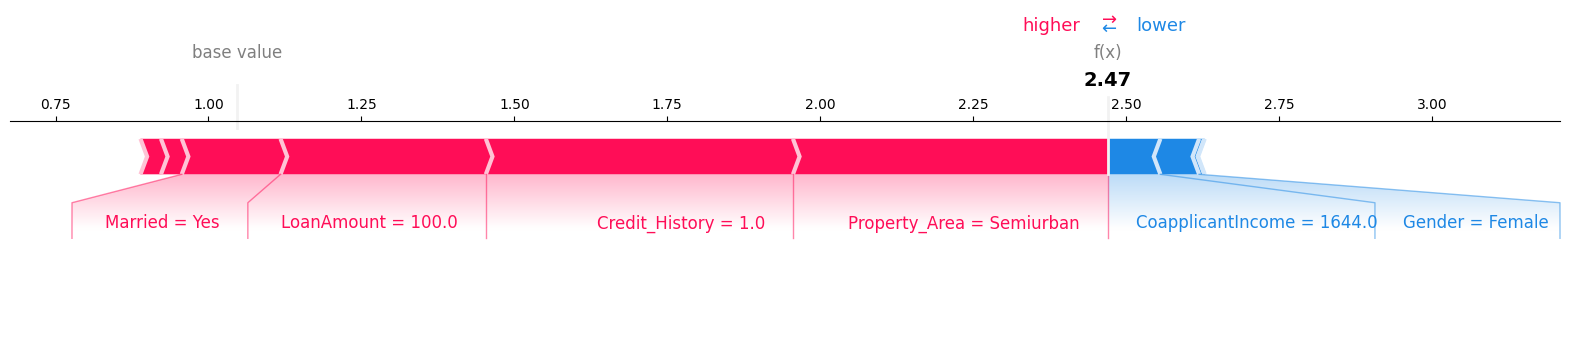

Probability: 0.8819112145189575, Log of Odds : 2.010654626258125


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
2,3158,3053.0,89.0,360.0,1.0,Male,No,0,Graduate,No,Rural


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,0.497475,3158,1.04707
1,CoapplicantIncome,0.290533,3053.0,1.04707
2,LoanAmount,0.031855,89.0,1.04707
3,Loan_Amount_Term,0.007890,360.0,1.04707
4,Credit_History,0.412932,1.0,1.04707
5,Gender,0.024089,Male,1.04707
6,Married,-0.297944,No,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.016853,Graduate,1.04707
9,Self_Employed,-0.002004,No,1.04707


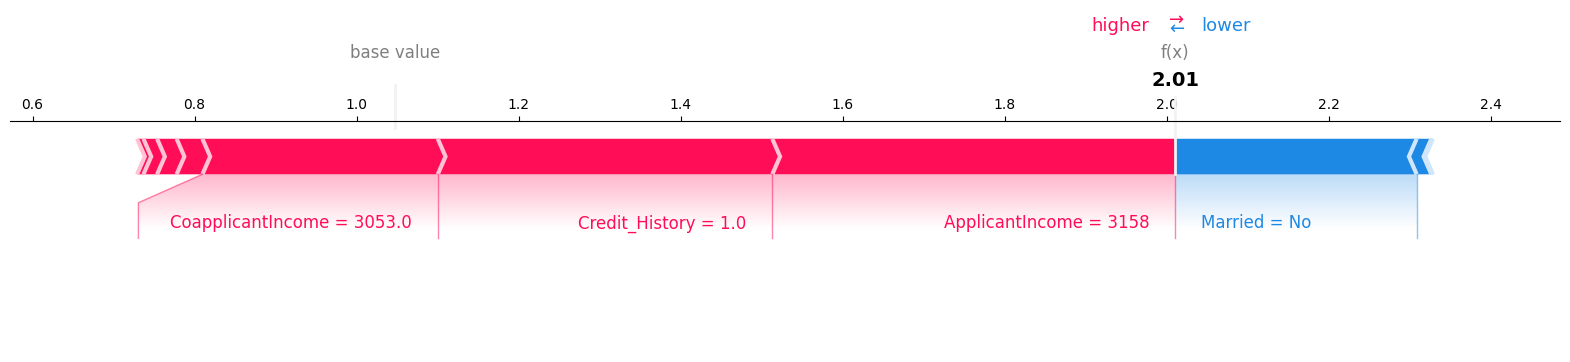

Probability: 0.8472635583224046, Log of Odds : 1.71329798050953


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
3,6033,0.0,160.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,0.125491,6033,1.04707
1,CoapplicantIncome,-0.143610,0.0,1.04707
2,LoanAmount,0.145365,160.0,1.04707
3,Loan_Amount_Term,0.006583,360.0,1.04707
4,Credit_History,0.400326,1.0,1.04707
5,Gender,0.025703,Male,1.04707
6,Married,0.141072,Yes,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,-0.062829,Not Graduate,1.04707
9,Self_Employed,-0.002034,No,1.04707


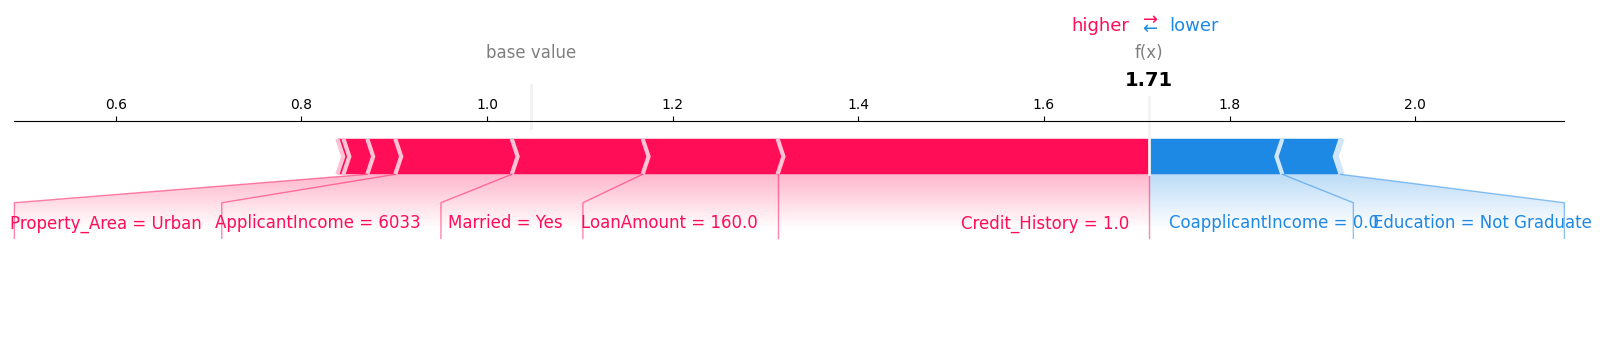

Probability: 0.8616260962417779, Log of Odds : 1.8288619447564187


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
4,39147,4750.0,120.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Semiurban


/Users/apple/.venvs/aienv/lib/python3.11/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.086386,39147,1.04707
1,CoapplicantIncome,-0.259243,4750.0,1.04707
2,LoanAmount,0.321459,120.0,1.04707
3,Loan_Amount_Term,0.018896,360.0,1.04707
4,Credit_History,0.444260,1.0,1.04707
5,Gender,0.011829,Male,1.04707
6,Married,0.121175,Yes,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.003957,Graduate,1.04707
9,Self_Employed,0.003099,Yes,1.04707


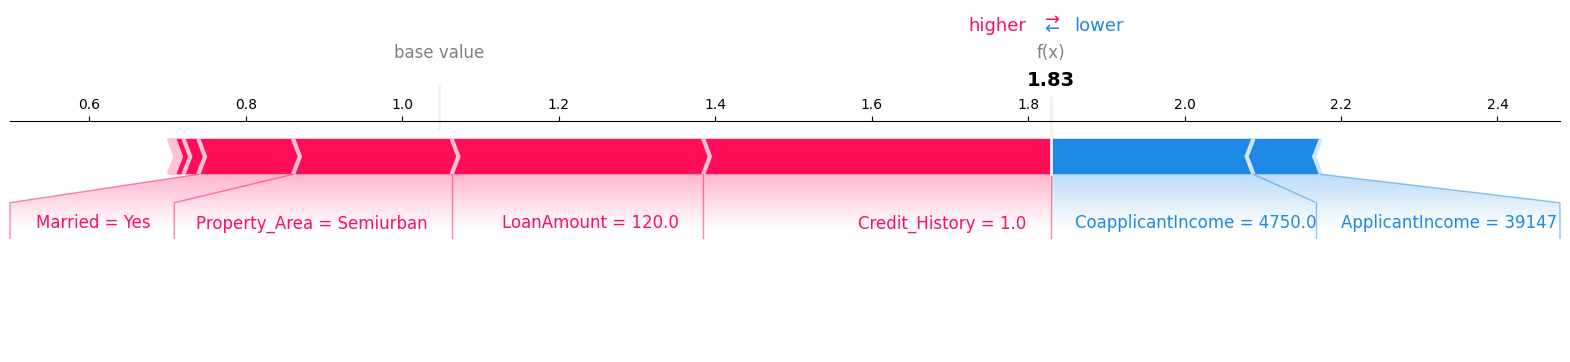

In [22]:
X_tmp = df_test_high_loan_prob[features]
for i in range(X_tmp.shape[0]):  # Loop through all instances 
    # Select a specific instance to explain
    instance_idx = i  # Change this index to explain a different instance
    instance = X_tmp.iloc[instance_idx:instance_idx+1]

    probability = model.predict(instance, num_iteration=model.best_iteration)[0]

    print(f"Probability: {probability}, Log of Odds : {probability_to_log_odds(probability)}")


    # display(X_test.iloc[[instance_idx+1]])

    display(instance)

    # Calculate SHAP values for the specific instance
    instance_shap_values = explainer.shap_values(instance)

    # Create a dataframe with feature names, SHAP values, and expected value
    feature_names = instance.columns
    shap_values_instance = instance_shap_values[0]  # SHAP values for the positive class for the specific instance
    expected_value = explainer.expected_value  # Expected value for the positive class

    # Create a dataframe
    shap_df = pd.DataFrame({
        'Feature Name': feature_names,
        'SHAP Value': shap_values_instance,
        'Feature Value': instance.values[0],
        'Expected Value': [expected_value] * len(feature_names)
    })

    # Display the dataframe
    display(shap_df)
    shap.force_plot(explainer.expected_value, instance_shap_values[0], instance, matplotlib=True)
    plt.show()

Calculating KPIs

In [74]:
shap_df

,Feature Name,SHAP Value,Feature Value,Expected Value
0,ApplicantIncome,-0.086386,39147,1.04707
1,CoapplicantIncome,-0.259243,4750.0,1.04707
2,LoanAmount,0.321459,120.0,1.04707
3,Loan_Amount_Term,0.018896,360.0,1.04707
4,Credit_History,0.444260,1.0,1.04707
5,Gender,0.011829,Male,1.04707
6,Married,0.121175,Yes,1.04707
7,Dependents,0.000000,0,1.04707
8,Education,0.003957,Graduate,1.04707
9,Self_Employed,0.003099,Yes,1.04707


In [75]:
import pandas as pd
shap_values = shap_df.set_index("Feature Name")[["SHAP Value", "Feature Value"]].to_dict(orient="index")

print(shap_values)


{'ApplicantIncome': {'SHAP Value': -0.08638626341919067, 'Feature Value': 39147}, 'CoapplicantIncome': {'SHAP Value': -0.2592426069505639, 'Feature Value': 4750.0}, 'LoanAmount': {'SHAP Value': 0.32145869252521414, 'Feature Value': 120.0}, 'Loan_Amount_Term': {'SHAP Value': 0.01889558395112233, 'Feature Value': 360.0}, 'Credit_History': {'SHAP Value': 0.4442599667398291, 'Feature Value': 1.0}, 'Gender': {'SHAP Value': 0.011828734653689691, 'Feature Value': 'Male'}, 'Married': {'SHAP Value': 0.12117480418551223, 'Feature Value': 'Yes'}, 'Dependents': {'SHAP Value': 0.0, 'Feature Value': '0'}, 'Education': {'SHAP Value': 0.0039571009639345935, 'Feature Value': 'Graduate'}, 'Self_Employed': {'SHAP Value': 0.0030993481698327824, 'Feature Value': 'Yes'}, 'Property_Area': {'SHAP Value': 0.20274698307525132, 'Feature Value': 'Semiurban'}}


In [85]:
def kpi_gen(shap_df):
  shap_values = shap_df.set_index("Feature Name")[["SHAP Value", "Feature Value"]].to_dict(orient="index")
  ApplicantIncome = shap_values["ApplicantIncome"]["Feature Value"]
  CoapplicantIncome = shap_values["CoapplicantIncome"]["Feature Value"]
  LoanAmount = shap_values["LoanAmount"]["Feature Value"]
  Loan_Amount_Term = shap_values["Loan_Amount_Term"]["Feature Value"]
  Credit_History = shap_values["Credit_History"]["Feature Value"]

  ApplicantIncome_SHAP = shap_values["ApplicantIncome"]["SHAP Value"]
  LoanAmount_SHAP = shap_values["LoanAmount"]["SHAP Value"]
  Loan_Amount_Term_SHAP = shap_values["Loan_Amount_Term"]["SHAP Value"]


  # Calculate KPIs
  Debt_to_Income_Ratio = LoanAmount / (ApplicantIncome + CoapplicantIncome)
  EMI_to_Income_Ratio = (LoanAmount / Loan_Amount_Term) / (ApplicantIncome + CoapplicantIncome)

  # Creditworthiness Score (adjust weights as needed)
  Creditworthiness_Score = (Credit_History * 0.7) + (ApplicantIncome_SHAP * 0.1) + (LoanAmount_SHAP * 0.1) + (Loan_Amount_Term_SHAP * 0.1)

  # Loan Burden Score
  Loan_Burden_Score = (LoanAmount_SHAP * 0.5) + (Loan_Amount_Term_SHAP * 0.5)

  # Create JSON response
  kpis = {
      "Debt_to_Income_Ratio": Debt_to_Income_Ratio,
      "EMI_to_Income_Ratio": EMI_to_Income_Ratio,
      "Creditworthiness_Score": Creditworthiness_Score,
      "Loan_Burden_Score": Loan_Burden_Score,
  }
  return json.dumps(kpis)

# print(json.dumps(kpis))

In [86]:
kpi_gen(shap_df)

'{"Debt_to_Income_Ratio": 0.0027336720049206094, "EMI_to_Income_Ratio": 7.5935333470016925e-06, "Creditworthiness_Score": 0.7253968013057145, "Loan_Burden_Score": 0.17017713823816824}'

In [73]:
with open('shap_df.json', 'w') as file:
    file.write(json_str)

In [ ]:
import json

# Input Data
shap_values = {
    "ApplicantIncome": {"SHAP Value": -0.086386, "Feature Value": 39147},
    "CoapplicantIncome": {"SHAP Value": -0.259243, "Feature Value": 4750.0},
    "LoanAmount": {"SHAP Value": 0.321459, "Feature Value": 120.0},
    "Loan_Amount_Term": {"SHAP Value": 0.018896, "Feature Value": 360.0},
    "Credit_History": {"SHAP Value": 0.444260, "Feature Value": 1.0},
    "Gender": {"SHAP Value": 0.011829, "Feature Value": "Male"},
    "Married": {"SHAP Value": 0.121175, "Feature Value": "Yes"},
    "Dependents": {"SHAP Value": 0.000000, "Feature Value": 0},
    "Education": {"SHAP Value": 0.003957, "Feature Value": "Graduate"},
    "Self_Employed": {"SHAP Value": 0.003099, "Feature Value": "Yes"},
    "Property_Area": {"SHAP Value": 0.202747, "Feature Value": "Semiurban"}
}


ApplicantIncome = shap_values["ApplicantIncome"]["Feature Value"]
CoapplicantIncome = shap_values["CoapplicantIncome"]["Feature Value"]
LoanAmount = shap_values["LoanAmount"]["Feature Value"]
Loan_Amount_Term = shap_values["Loan_Amount_Term"]["Feature Value"]
Credit_History = shap_values["Credit_History"]["Feature Value"]

ApplicantIncome_SHAP = shap_values["ApplicantIncome"]["SHAP Value"]
LoanAmount_SHAP = shap_values["LoanAmount"]["SHAP Value"]
Loan_Amount_Term_SHAP = shap_values["Loan_Amount_Term"]["SHAP Value"]


# Calculate KPIs
Debt_to_Income_Ratio = LoanAmount / (ApplicantIncome + CoapplicantIncome)
EMI_to_Income_Ratio = (LoanAmount / Loan_Amount_Term) / (ApplicantIncome + CoapplicantIncome)

# Creditworthiness Score (adjust weights as needed)
Creditworthiness_Score = (Credit_History * 0.7) + (ApplicantIncome_SHAP * 0.1) + (LoanAmount_SHAP * 0.1) + (Loan_Amount_Term_SHAP * 0.1)

# Loan Burden Score
Loan_Burden_Score = (LoanAmount_SHAP * 0.5) + (Loan_Amount_Term_SHAP * 0.5)

# SHAP Insights
SHAP_Insights = "Credit History, Property Area, and Loan Amount positively influence the decision. Applicant and Coapplicant Income have a negative influence."

# Create JSON response
kpis = {
    "Debt_to_Income_Ratio": Debt_to_Income_Ratio,
    "EMI_to_Income_Ratio": EMI_to_Income_Ratio,
    "Creditworthiness_Score": Creditworthiness_Score,
    "Loan_Burden_Score": Loan_Burden_Score,
    "SHAP_Insights": SHAP_Insights
}

print(json.dumps(kpis))

Start of the GENAI part

In [87]:
improved_prompt = f'''Here are the feature definitions:

- **Loan_ID**: Unique identifier for each loan application.
- **Gender**: Applicant's gender classification (e.g., Male, Female).
- **Married**: Marital status of the primary applicant (e.g., Yes, No).
- **Dependents**: Number of financial dependents supported by the applicant.
- **Education**: Educational qualification of the applicant (e.g., Graduate, Not Graduate).
- **Self_Employed**: Employment type indicator (Yes = Self-Employed, No = Salaried/Fixed Income).
- **ApplicantIncome**: Monthly gross income of the primary applicant.
- **CoapplicantIncome**: Monthly gross income of the co-applicant, if any.
- **LoanAmount**: Total loan amount requested by the applicant.
- **Loan_Amount_Term**: Loan repayment tenure in months.
- **Credit_History**: Binary indicator of the applicant's past credit performance (1 = Good Credit History, 0 = No/Faulty Credit History).
- **Property_Area**: Geographic classification of the property location (Urban, Semiurban, Rural).
- **Loan_Status**: Final decision on loan sanctioning (Y = Approved, N = Rejected).

Conduct a comprehensive **credit risk evaluation** using advanced quantitative methods and industry-standard credit underwriting principles. Your analysis must incorporate numerical rigor and leverage the following technical considerations:

1. **Debt-to-Income (DTI) Analysis**: Quantitatively assess the applicant's capacity to manage monthly installments relative to their total income streams. Compute the DTI and compare it against established risk thresholds.
2. **Creditworthiness & Default Risk Modeling**: Analyze historical credit performance using statistical credit scoring algorithms. Highlight deviations in credit behavior and assess their impact on default probability.
3. **Geospatial & Collateral Liquidity Assessment**: Evaluate property location risk by quantifying the impact of regional economic indicators and real estate market volatility on collateral value.
4. **Loan Tenure and Risk Exposure Correlation**: Examine the alignment between the proposed loan term and the applicant's income stability. Evaluate how extended maturities might amplify credit exposure using time-series risk models.
5. **Self-Employment Volatility Premium**: Incorporate a risk premium adjustment for self-employed applicants by quantifying income variability and its statistical impact on repayment reliability.


## SHAP Values Analysis
Given the SHAP values:
{shap_df}

And the derived KPI values:
{kpi_gen(shap_df)}

Your response must provide a detailed, jargon-heavy, and numerically driven evaluation. Include precise quantitative justifications where applicable and adhere strictly to the following output format:

{{
    'pros': 'Provide a technical analysis of positive risk mitigators, favorable numerical trends, and any robust financial buffers identified in the SHAP and KPI assessments.',
    'cons': 'Detail potential red flags, numerical deviations, and statistical risks that may undermine the creditworthiness of the applicant.',
    'overall': 'Present a final verdict that synthesizes all quantitative analyses into a clear approval recommendation or rejection decision, supported by numerical evidence and technical reasoning.'
}}

Ensure your final output is structured, uses domain-specific technical language, and explicitly references key numerical indicators from the provided SHAP values and KPIs to substantiate your evaluation.
'''


In [91]:
output = llm.invoke(improved_prompt).content

In [92]:
print(output)

```json
{
  "pros": "The applicant exhibits several positive indicators that mitigate credit risk.  The SHAP value for Credit_History (0.444260) significantly contributes to a favorable outcome, reflecting a strong track record of responsible credit management. This aligns with the high Creditworthiness_Score of 0.7253968, suggesting a low probability of default based on historical credit behavior.  Furthermore, residing in a Semiurban Property_Area contributes positively (SHAP value: 0.202747), potentially indicating access to stable regional economic conditions and moderate collateral liquidity. The low Debt_to_Income_Ratio (0.002733672) and extremely low EMI_to_Income_Ratio (7.5935333470016925e-06) demonstrate a robust capacity to service the proposed debt burden, suggesting ample financial buffer against unforeseen income fluctuations.  Being Married (SHAP value: 0.121175) also contributes positively, potentially reflecting greater financial stability through combined income stream

In [95]:
import re
import json

# Example pattern to find JSON block (assuming it starts with { and ends with })
match = re.search(r'({.*})', output, re.DOTALL)
if match:
    json_str = match.group(1)
    try:
        json_obj = json.loads(json_str)
        print(json_obj)
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
else:
    print("No JSON object found in the output.")


{'pros': 'The applicant exhibits several positive indicators that mitigate credit risk.  The SHAP value for Credit_History (0.444260) significantly contributes to a favorable outcome, reflecting a strong track record of responsible credit management. This aligns with the high Creditworthiness_Score of 0.7253968, suggesting a low probability of default based on historical credit behavior.  Furthermore, residing in a Semiurban Property_Area contributes positively (SHAP value: 0.202747), potentially indicating access to stable regional economic conditions and moderate collateral liquidity. The low Debt_to_Income_Ratio (0.002733672) and extremely low EMI_to_Income_Ratio (7.5935333470016925e-06) demonstrate a robust capacity to service the proposed debt burden, suggesting ample financial buffer against unforeseen income fluctuations.  Being Married (SHAP value: 0.121175) also contributes positively, potentially reflecting greater financial stability through combined income streams. The rela

In [96]:
json_obj

{'pros': 'The applicant exhibits several positive indicators that mitigate credit risk.  The SHAP value for Credit_History (0.444260) significantly contributes to a favorable outcome, reflecting a strong track record of responsible credit management. This aligns with the high Creditworthiness_Score of 0.7253968, suggesting a low probability of default based on historical credit behavior.  Furthermore, residing in a Semiurban Property_Area contributes positively (SHAP value: 0.202747), potentially indicating access to stable regional economic conditions and moderate collateral liquidity. The low Debt_to_Income_Ratio (0.002733672) and extremely low EMI_to_Income_Ratio (7.5935333470016925e-06) demonstrate a robust capacity to service the proposed debt burden, suggesting ample financial buffer against unforeseen income fluctuations.  Being Married (SHAP value: 0.121175) also contributes positively, potentially reflecting greater financial stability through combined income streams. The rela